## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu



# Section 1: Exploratory Data Analysis



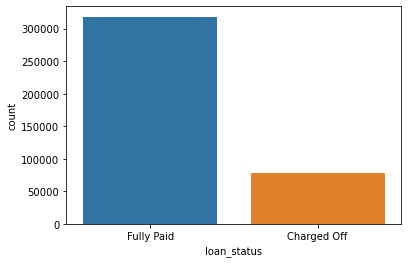

In [9]:
sns.countplot(x=df['loan_status'])

**a histogram of the loan_amnt column.**

(array([4.9770e+03, 1.3955e+04, 1.4540e+04, 2.4996e+04, 2.9581e+04,
        2.6121e+04, 2.0226e+04, 4.1059e+04, 3.0417e+04, 1.1955e+04,
        1.3780e+04, 3.5188e+04, 9.4430e+03, 1.3936e+04, 2.5860e+04,
        8.7560e+03, 6.2520e+03, 1.2233e+04, 1.2122e+04, 2.6970e+03,
        7.9060e+03, 1.9250e+03, 8.1750e+03, 2.2920e+03, 1.3880e+03,
        1.2900e+03, 1.4749e+04, 1.2000e+01, 1.2000e+01, 1.8700e+02]),
 array([  500.        ,  1816.66666667,  3133.33333333,  4450.        ,
         5766.66666667,  7083.33333333,  8400.        ,  9716.66666667,
        11033.33333333, 12350.        , 13666.66666667, 14983.33333333,
        16300.        , 17616.66666667, 18933.33333333, 20250.        ,
        21566.66666667, 22883.33333333, 24200.        , 25516.66666667,
        26833.33333333, 28150.        , 29466.66666667, 30783.33333333,
        32100.        , 33416.66666667, 34733.33333333, 36050.        ,
        37366.66666667, 38683.33333333, 40000.        ]),
 <a list of 30 Patch objects

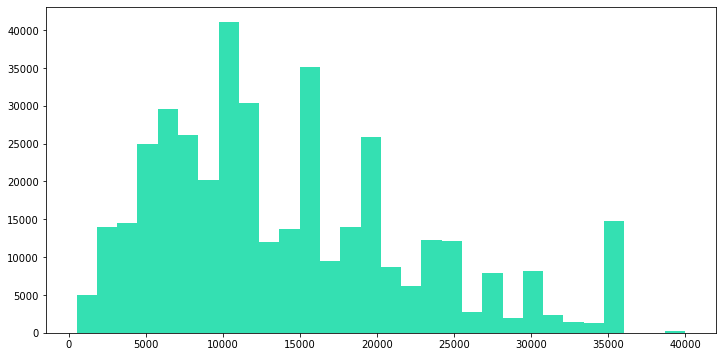

In [10]:
plt.figure(figsize=(12,6))
plt.hist(x=df['loan_amnt'],bins=30,color='#34e0b2')

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


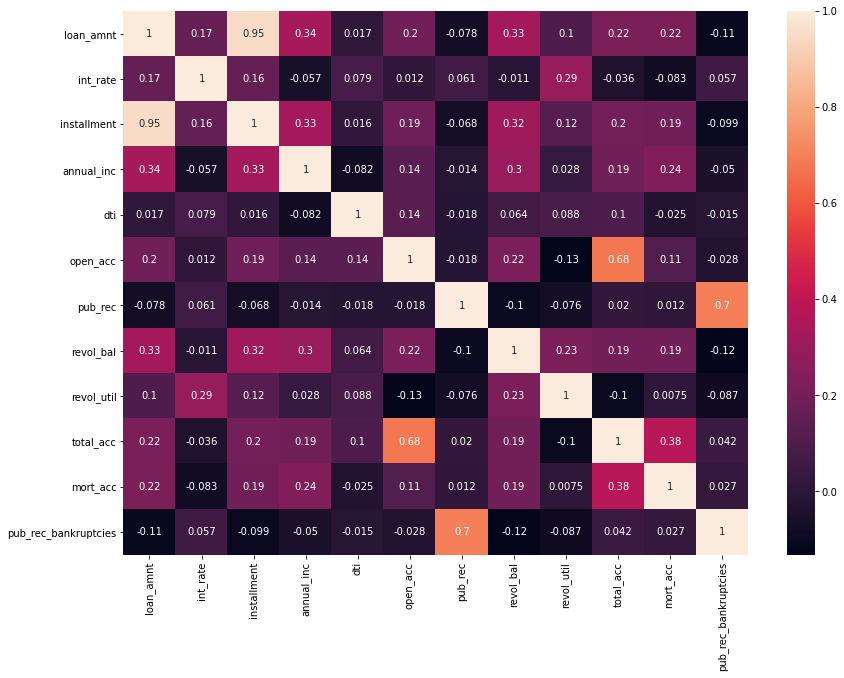

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


The monthly payment owed by the borrower if the loan originates.


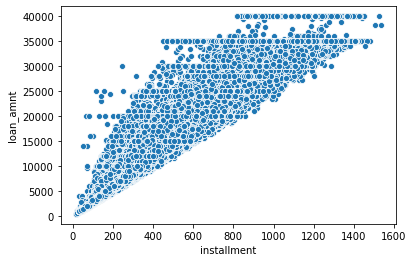

In [15]:
sns.scatterplot(x=df['installment'],y=df['loan_amnt'])

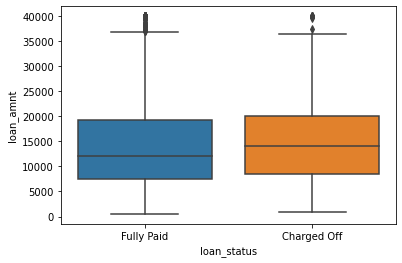

In [16]:
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'])

In [17]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
# pd.DataFrame(df['sub_grade'].unique())[0].sort_values()
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

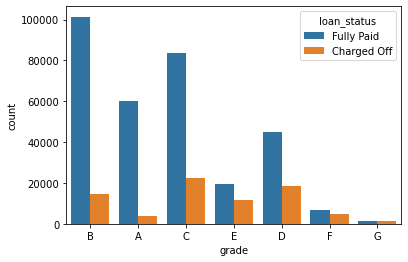

In [19]:
sns.countplot(df['grade'],hue=df['loan_status'])

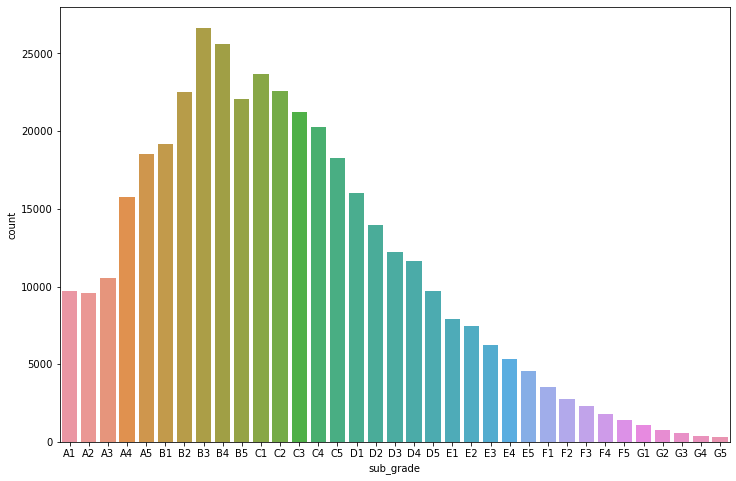

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'].sort_values())

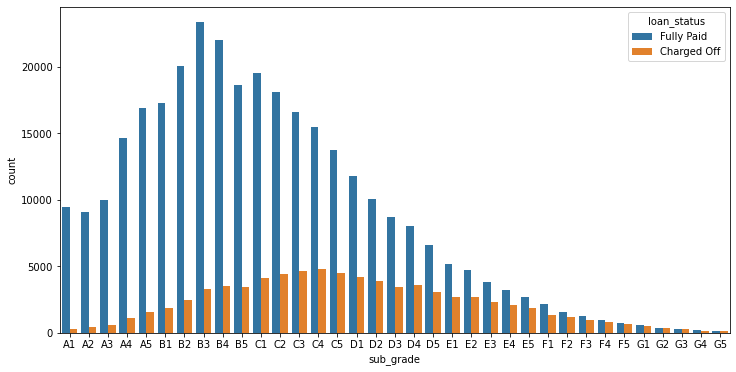

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['sub_grade'].sort_values(),hue=df['loan_status'])

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [21]:
## done in ps_kpro but without hue


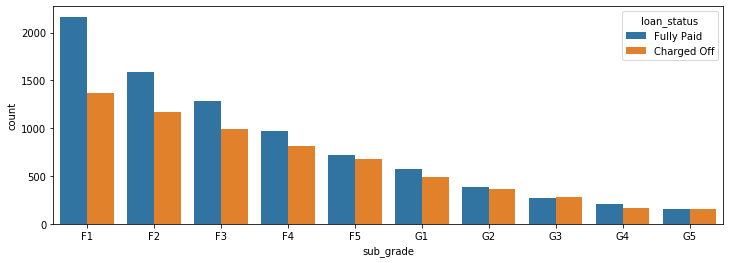

**New column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [11]:
df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**A bar plot showing the correlation of the numeric features to the new loan_repaid column.**

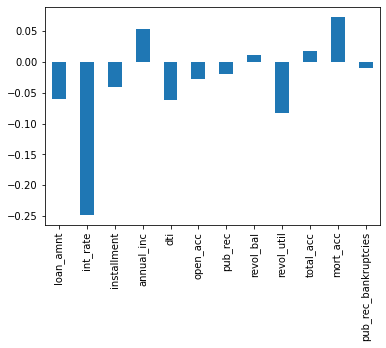

In [24]:
df.corr()['loan_repaid'][:12].plot(kind='bar')

---
---
# Data PreProcessing





,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data


In [25]:
len(df)

396030

396030

**total count of missing values per column.**

In [26]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**percentage of the total DataFrame**

In [13]:
(df.isna().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [14]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
df['emp_title'].nunique()

173105

173105

In [11]:
df['emp_title'].value_counts()

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Sacramento Container Corporation       1
RDU Airport Authority                  1
Woodmont Real Estate Services          1
Fresh Express Chiquita                 1
Foreman-welder-millwright              1
Name: emp_title, Length: 173105, dtype: int64

**there are too many unique job titles to try to convert this to a dummy variable**

In [12]:
df = df.drop('emp_title',axis=1)

In [16]:
df['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

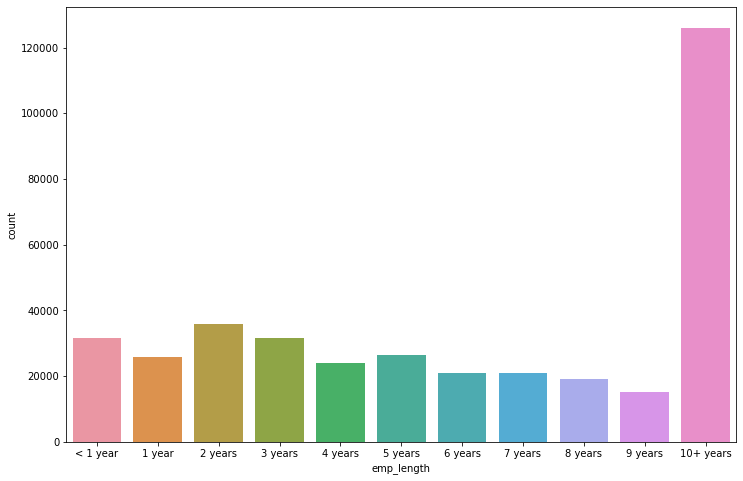

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(df['emp_length'].sort_values(),order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years'])

**Fully Paid vs Charged Off**

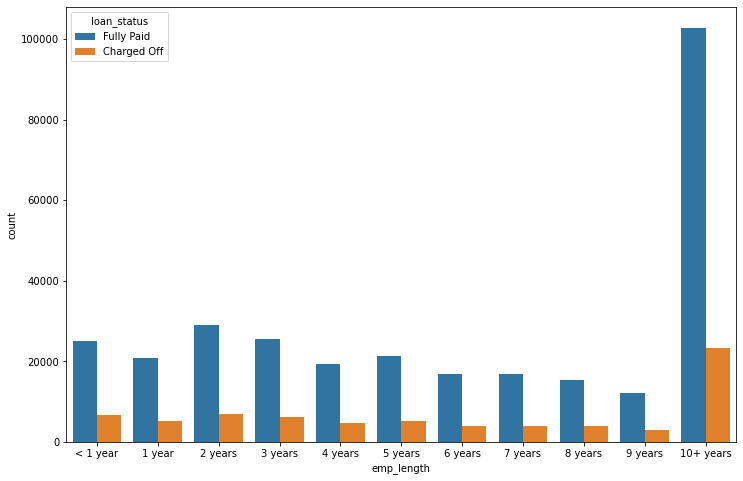

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(df['emp_length'].sort_values(),order=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years'],hue=df['loan_status'])

**we want the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [83]:
#no of ppl who have repaid the loan
df.groupby(['emp_length'])['loan_repaid'].sum()

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_repaid, dtype: int64

In [34]:
df.groupby(['emp_length'])['loan_repaid'].sum()/df.groupby(['emp_length'])['loan_repaid'].count()

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_repaid, dtype: float64

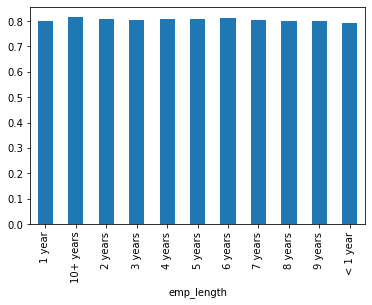

In [35]:
(df.groupby(['emp_length'])['loan_repaid'].sum()/df.groupby(['emp_length'])['loan_repaid'].count()).plot(kind='bar')

In [87]:
#the differences in emp_length vs fullpaid or charged off is very less across all the years.
#so almost no effect to the loan status

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [13]:
df=df.drop('emp_length',axis=1)

In [18]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [38]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [39]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column**

In [14]:
df = df.drop('title',axis=1)

In [20]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [42]:
feat_info('mort_acc')

Number of mortgage accounts.


Number of mortgage accounts.


In [43]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [44]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

**We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [45]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [15]:
# apply the function on whole df and send the cols as parameters
mort_mean = df.groupby('total_acc')['mort_acc'].mean()
def fill(total_acc,mort_acc):
    if(np.isnan(mort_acc)):
        return mort_mean[total_acc]
    else:
        return mort_acc
        


df['mort_acc']=df.apply(lambda x:fill(x['total_acc'],x['mort_acc']),axis=1)

In [16]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

0.0

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the data**

In [17]:
df=df.dropna()

In [18]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**


In [56]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [25]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [27]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [19]:
df=df.drop('grade',axis=1)

In [20]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [21]:
sub_dum=pd.get_dummies(df['sub_grade'].sort_values())
sub_dum

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
190774,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113717,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209110,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236415,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
347182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
329161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
df=pd.concat([df,sub_dum],axis=1)
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36 months,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36 months,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36 months,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36 months,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60 months,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df=df.drop('sub_grade',axis=1)

In [24]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [44]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 


In [25]:
df2=pd.get_dummies(df[ ['verification_status', 'application_type','initial_list_status','purpose'] ])
df2

,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df=pd.concat([df,df2],axis=1)
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36 months,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36 months,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36 months,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36 months,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60 months,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df=df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


### home_ownership


In [49]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [30]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#this replace call merged those converted values to the original other values
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [32]:
hd=pd.get_dummies(df['home_ownership'])
hd

,MORTGAGE,OTHER,OWN,RENT
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
396025,0,0,0,1
396026,1,0,0,0
396027,0,0,0,1
396028,1,0,0,0


In [33]:
df=pd.concat([df,hd],axis=1)
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,1,0,0,0,0,1
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,1,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,1,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df=df.drop('home_ownership',axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,1,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,1,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,1,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,1,0,0,0


### address
**feature engineer a zip code column from the address in the data set**

In [36]:
def zipc(addr):
    return addr[-5:]


zip_code=df.apply(lambda x:zipc(x['address']),axis=1)

In [37]:
df['zip_code']=zip_code
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,MORTGAGE,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,1,0,0,0,0,1,22690
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,1,0,0,0,05113
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,1,05113
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,1,00813
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,1,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,1,30723
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,1,0,0,0,05113
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,1,70466
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,1,0,0,0,29597


**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [38]:
zipd=pd.get_dummies(zip_code)
zipd

,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,1,0,0,0,0
396026,0,1,0,0,0,0,0,0,0,0
396027,0,0,0,0,0,0,0,1,0,0
396028,0,0,0,0,1,0,0,0,0,0


In [40]:
df=pd.concat([df,zipd],axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
df=df.drop(['address','zip_code'],axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


### issue_d 



In [44]:
df=df.drop('issue_d',axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,00813,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,1,0,0,0,0,0


### earliest_cr_line
**This appears to be a historical time stamp feature. Extracting the year from this feature using .apply function, then converting to a numeric feature.**

In [45]:
df.select_dtypes(include='object')

,loan_status,earliest_cr_line
0,Fully Paid,Jun-1990
1,Fully Paid,Jul-2004
2,Fully Paid,Aug-2007
3,Fully Paid,Sep-2006
4,Charged Off,Mar-1999
...,...,...
396025,Fully Paid,Nov-2004
396026,Fully Paid,Feb-2006
396027,Fully Paid,Mar-1997
396028,Fully Paid,Nov-1990


In [46]:
def year(ecr):
    return ecr[-4:]


ec_yr=df.apply(lambda x:year(x['earliest_cr_line']),axis=1)
ec_yr

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Length: 395219, dtype: object

In [47]:
ec_years=pd.to_numeric(ec_yr)
ec_years

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Length: 395219, dtype: int64

In [48]:
df['earliest_cr_year']=ec_years
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,1,0,0,0,0,0,1990


In [49]:
df=df.drop('earliest_cr_line',axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,...,0,0,0,1,0,0,0,0,0,1990


In [50]:
#coverted all the string values in cols except loan_status
df.select_dtypes(include='object')

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off
...,...
396025,Fully Paid
396026,Fully Paid
396027,Fully Paid
396028,Fully Paid


Index(['loan_status'], dtype='object')

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df=df.drop('loan_status',axis=1)
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


**Set X and y variables to the .values of the features and label.**

In [58]:
# ran the cell again after grabbing sample below
#set input features dropping only the label loan_repaid
X=df.drop('loan_repaid',axis=1).values
X.shape

(39522, 85)

In [59]:
y=df['loan_repaid'].values
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

**using sample from the dataset to train**

In [56]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


In [61]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [63]:
X_train.shape

(31617, 85)

## Normalizing the Data

**we don't want data leakge from the test set so we only fit on the X_train data.**

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train=scaler.fit_transform(X_train)

In [70]:
X_test=scaler.transform(X_test)

# Creating the Model



In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [72]:
model = Sequential()

In [73]:

model.add(Dense(86,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21,activation='relu'))

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy')


In [74]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=25)

Train on 31617 samples, validate on 7905 samples
Epoch 1/25
31617/31617 [==============================] - 3s 89us/sample - loss: 0.3642 - val_loss: 0.2735
Epoch 2/25
31617/31617 [==============================] - 2s 60us/sample - loss: 0.2776 - val_loss: 0.2762
Epoch 3/25
31617/31617 [==============================] - 2s 60us/sample - loss: 0.2723 - val_loss: 0.2720
Epoch 4/25
31617/31617 [==============================] - 2s 58us/sample - loss: 0.2689 - val_loss: 0.2697
Epoch 5/25
31617/31617 [==============================] - 2s 57us/sample - loss: 0.2661 - val_loss: 0.2729
Epoch 6/25
31617/31617 [==============================] - 2s 60us/sample - loss: 0.2651 - val_loss: 0.2702
Epoch 7/25
31617/31617 [==============================] - 2s 58us/sample - loss: 0.2645 - val_loss: 0.2704
Epoch 8/25
31617/31617 [==============================] - 2s 58us/sample - loss: 0.2635 - val_loss: 0.2691
Epoch 9/25
31617/31617 [==============================] - 2s 58us/sample - loss: 0.2624 - val_l

In [75]:
model.save('ps_kpro_model.h5')

# Evaluating Model Performance.



In [77]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.364234,0.273547
1,0.277638,0.276242
2,0.272318,0.271988
3,0.268921,0.269703
4,0.266065,0.272931
5,0.265091,0.270213
6,0.264460,0.270367
7,0.263461,0.269146
8,0.262424,0.269127
9,0.260445,0.270986


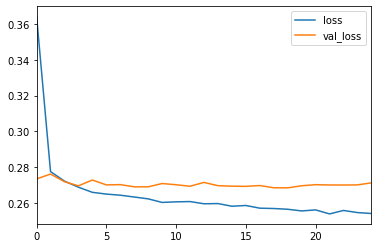

In [78]:
pd.DataFrame(model.history.history).plot()

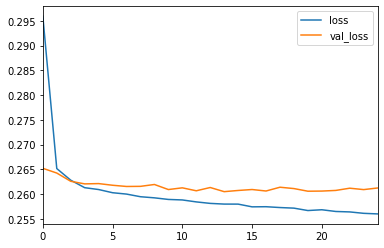

**display a classification report and confusion matrix for the X_test set.**

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
y_pred =model.predict_classes(X_test)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [90]:
# compare the predicted test results to y_test label
dfp=pd.DataFrame(y_pred,columns=['y_pred'])
dfp= pd.concat([dfp,pd.DataFrame(y_test,columns=['y_test'])],axis=1)
dfp

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
7900,1,1
7901,1,1
7902,1,1
7903,1,1


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.45      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.89      0.72      0.77      7905
weighted avg       0.88      0.88      0.87      7905



In [93]:
print(confusion_matrix(y_test,y_pred))
## based on the confusion matrix the model predicted 0(charged off) with 45% accuracy as-
## 711 were true -ve(charged off) but 859 were false +ve(predcited as fully paid(1))
## but good performance on predicting fully paid 98% accuracy

[[ 711  859]
 [  78 6257]]


              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**NEW CUSTOMER TEST**

In [94]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 85, dtype: float64

In [96]:
new_customer=scaler.transform(new_customer.values.reshape(-1,85))

In [97]:
model.predict_classes(new_customer)

array([[1]])

array([[1]])

In [99]:
df['loan_repaid'].iloc[random_ind]

1

In [100]:
df.iloc[random_ind]

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 86, dtype: float64

In [ ]:
#the new person has paid back the loan
#so the predicted value matches successfully

1.0